In [1]:
import pandas as pd 
import numpy as np
import statistics as st

In [2]:
full_data = pd.read_excel('HW1_Question2_dataset.xlsx')

In [3]:
### AVERAGE WEEKLY EXPENDITURES
full_data_pivot = full_data.groupby(by = 'week').mean()['amount']

In [24]:
train_data = full_data_pivot[:52]
test_data = full_data_pivot[52:]

population_mean = train_data.mean()
population_std = st.pstdev(train_data)

In [6]:
def rule1(data, pop_mean, pop_std):
    '''
    Function returns a list of flags if a value of a row in input data is more than 3 standard
    deviations from the mean
    '''
    UCL = pop_mean+3*pop_std
    LCL = pop_mean-3*pop_std
    rule1_flaglist = []
    for week_mean in data:
        if (week_mean > UCL) | (week_mean < LCL):
            rule1_flaglist.append(1)
        else:
            rule1_flaglist.append(0)
    return rule1_flaglist

In [7]:
def rule2(data, pop_mean):
    '''
    Function returns a list of flags if a value of a row in input data is Nine (or more) points in a row are on the
    same side of the mean 
    '''
    rule2_flaglist = []
    for i in range(len(data)):
        if  (~data[i-8:i+1].empty) & ((all(data[i-8:i+1] > pop_mean)) | (all(data[i-8:i+1] < pop_mean))):
            rule2_flaglist.append(1)
        else: 
            rule2_flaglist.append(0)
    return rule2_flaglist

In [8]:
def rule3(data):
    '''
    Function returns a list of flags if a value of a row in input data is Six (or more) points in a row are
    continually increasing (or decreasing)
    '''
    rule3_flaglist = []
    for i in range(len(data)):
        if  (~data[i-5:i+1].empty) & ((data[i-5:i+1].is_monotonic_increasing) | (data[i-5:i+1].is_monotonic_decreasing)) & (data[i-5:i+1].is_unique):
            rule3_flaglist.append(1)
        else: 
            rule3_flaglist.append(0)
    return rule3_flaglist

In [9]:
def rule4(data):
    '''
    Function returns a list of flags if a value of a row in input data is Fourteen (or more) points in a row
    alternate in direction, increasing then decreasing
    '''
    rule4_flaglist = []
    for i in range(len(data)):
        
        array = data[i-13:i+1]
        row_differences = np.diff(array)
        even = row_differences[::2]
        odd = row_differences[1::2]
        
        if (array.empty):
            rule4_flaglist.append(0)
        elif (row_differences[0] > 0):
            if all(even > 0) & all(odd < 0):
                rule4_flaglist.append(1)
            else: 
                rule4_flaglist.append(0)
        elif (row_differences[0] < 0):
            if all(even < 0) & all(odd > 0):
                rule4_flaglist.append(1)
            else: 
                rule4_flaglist.append(0)
        else:
            rule4_flaglist.append(0)
    return rule4_flaglist

In [10]:
def rule5(data, pop_mean, pop_std):
    '''
    Function returns a list of flags if a value of a row in input data is two (or three) out of three points in a row
    are more than 2 standard deviations from the mean in the same direction
    '''
    UCL_2std = pop_mean + 2*pop_std
    LCL_2std = pop_mean - 2*pop_std
    rule5_flaglist = []
    for i in range(len(data)):
        array = data[i-2:i+1]
        if  (~array.empty) & (all(array  > UCL_2std) | all(array  < LCL_2std) | all((array > UCL_2std)[:2]) | all((array > UCL_2std)[1:3]) | all((array < LCL_2std)[:2]) | all((array < LCL_2std)[1:3])):
            rule5_flaglist.append(1)
        else: 
            rule5_flaglist.append(0)
    return rule5_flaglist

In [11]:
def rule6(data, pop_mean, pop_std):
    '''
    Function returns a list of flags if a value of a row in input data is Four (or five) out of five points in a row
    are more than 1 standard deviation from the mean in the same direction
    '''
    UCL_std = pop_mean + pop_std
    LCL_std = pop_mean - pop_std
    rule6_flaglist = []
    for i in range(len(data)):
        array = data[i-4:i+1]
        if  (~array.empty) & (all(array  > UCL_std) | all(array  < LCL_std) | all((array > UCL_std)[:4]) | all((array > UCL_std)[1:5]) | all((array < LCL_std)[:2]) | all((array < LCL_std)[1:3])):
            rule6_flaglist.append(1)
        else: 
            rule6_flaglist.append(0)
    return rule6_flaglist

In [12]:
def rule7(data, pop_mean, pop_std):
    '''
    Function returns a list of flags if a value of a row in input data is Fifteen points in a row are all within 1
    standard deviation of the mean on either side of the mean
    '''
    UCL_1std = pop_mean + pop_std
    LCL_1std = pop_mean - pop_std
    rule7_flaglist = []
    for i in range(len(data)):
        array = data[i-14:i+1]
        if  (~array.empty) & ((all(array > LCL_1std)) | (all(array < UCL_1std))):
            rule7_flaglist.append(1)
        else: 
            rule7_flaglist.append(0)
    return rule7_flaglist

In [13]:
def rule8(data, pop_mean, pop_std):
    '''
    Function returns a list of flags if a value of a row in input data is Fifteen points in a row are all within 1
    standard deviation of the mean on either side of the mean
    '''
    UCL_1std = pop_mean + pop_std
    LCL_1std = pop_mean - pop_std
    rule7_flaglist = []
    for i in range(len(data)):
        array = data[i-14:i+1]
        if  (~array.empty) & (all((array < LCL_1std) | (array > UCL_1std))) & any(array > pop_mean) & any(array < pop_mean)   :
            rule7_flaglist.append(1)
        else: 
            rule7_flaglist.append(0)
    return rule7_flaglist

In [25]:
r1 = rule1(test_data, population_mean, population_std)
r2 = rule2(test_data, population_mean)
r3 = rule3(test_data)
r4 = rule4(test_data)
r5 = rule5(test_data, population_mean, population_std)
r6 = rule6(test_data, population_mean, population_std)
r7 = rule7(test_data, population_mean, population_std)
r8 = rule8(test_data, population_mean, population_std)


Anomaly_Records = pd.DataFrame({'Week': test_data.index, 
                                 'Rule1' : r1,'Rule2' : r2,
                                 'Rule3' : r3,'Rule4' : r4,
                                 'Rule5' : r5,'Rule6' : r6,
                                 'Rule7' : r7,'Rule8' : r8})

Anomaly_Records.set_index('Week', inplace = True)
Anomaly_Records.to_csv('Alarm_Rule_Set.csv')

### Train and Test Data

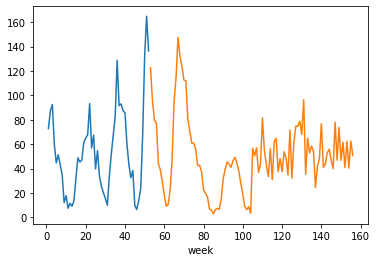

In [26]:
train_data.plot()
test_data.plot()

## Anomaly Distribution

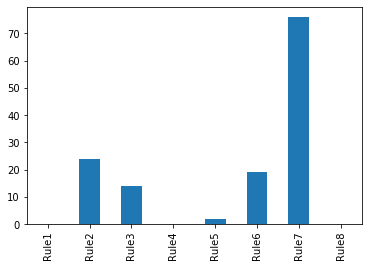

In [21]:
Anomaly_Records.sum().plot(kind= 'bar')